In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [14]:
df_data = pd.read_csv('./data_con_articulos.csv')

In [15]:
df_data_2022 = df_data[df_data.fecha.between('2022-01-01', '2023-01-01')]

In [16]:
columnas_drop = ['creado', 'fecha']

In [17]:
df_data_2022.drop(columns=columnas_drop,inplace=True)

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_37902/3799932649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_2022.drop(columns=columnas_drop,inplace=True)


In [18]:
df_data_vendedor_2022 = df_data_2022.groupby('vendedor').sum()

In [19]:
df_data_vendedor_2022['ventas_vendedor'] =  df_data_2022.groupby('vendedor').proyecto.nunique()

In [23]:
df_data_vendedor_2022.head(6)

,cantidad,costo,impresión,precio,total,mermas,paqueteria_o_gasto_extra,utilidad_real,inversion,utilidad_real/cantidad,...,cangurera,navaja,audífonos,pañalera,bata,mascarilla,almohada,peluche,termómetro,ventas_vendedor
vendedor,,,,,,,,,,,,,,,,,,,,,
ADRIAN GUEVARA,228291.0,14905.6174,2102.0200,25628.790,4898110.600,507.0,0.00,1345736.916,3552373.684,8446.796276,...,0,1,3,0,0,0,0,0,0,87
CARLOS ACOSTA,392650.0,9957.4810,438.6300,13577.780,1717320.570,78.0,0.00,598131.170,1119189.400,3181.669000,...,0,0,0,0,1,0,1,0,0,44
CRISTIAN HERNANDEZ,67353.0,20513.9950,1678.6220,30441.921,2855188.575,457.0,230.00,609264.764,2245923.811,7945.000043,...,3,2,0,0,0,0,0,0,0,124
JESSICA OSORIO,114486.0,86771.1970,1910.0800,101503.050,4740580.360,424.0,980.00,1098484.230,3642096.130,12651.856385,...,1,1,0,0,0,0,0,0,0,109
NORMA MARTINEZ,145159.0,38316.6810,2142.7922,58024.060,3835917.040,388.0,6669.85,1034874.957,2801042.083,17302.810154,...,1,1,0,0,0,0,0,1,0,164
YANET FLORES,566180.0,38615.0400,1448.3000,54232.160,6848187.830,205.0,54010.00,2525028.120,4323159.710,14056.483625,...,0,0,0,0,0,0,0,0,0,168


In [83]:
df_data_prueba = df_data_vendedor_2022[['utilidad_real','inversion','ventas_vendedor','paqueteria_o_gasto_extra']]

In [84]:
df_data_prueba

,utilidad_real,inversion,ventas_vendedor,paqueteria_o_gasto_extra
vendedor,,,,
ADRIAN GUEVARA,1345736.916,3552373.684,87,0.00
CARLOS ACOSTA,598131.170,1119189.400,44,0.00
CRISTIAN HERNANDEZ,609264.764,2245923.811,124,230.00
JESSICA OSORIO,1098484.230,3642096.130,109,980.00
NORMA MARTINEZ,1034874.957,2801042.083,164,6669.85
YANET FLORES,2525028.120,4323159.710,168,54010.00


In [58]:
df_data_prueba_escalado = df_data_prueba

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
df_data_prueba_escalado[['utilidad_real','inversion','ventas_vendedor','paqueteria_o_gasto_extra']] = scaler.fit_transform(df_data_prueba)

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_37902/2252585489.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
df_data_prueba_escalado

,utilidad_real,inversion,ventas_vendedor,paqueteria_o_gasto_extra
vendedor,,,,
ADRIAN GUEVARA,0.221664,0.577042,-0.672844,-0.524093
CARLOS ACOSTA,-0.930614,-1.743409,-1.670508,-0.524093
CRISTIAN HERNANDEZ,-0.913454,-0.668878,0.185612,-0.512407
JESSICA OSORIO,-0.159425,0.662607,-0.162411,-0.474300
NORMA MARTINEZ,-0.257465,-0.139479,1.113672,-0.185205
YANET FLORES,2.039294,1.312116,1.206478,2.220097


In [62]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



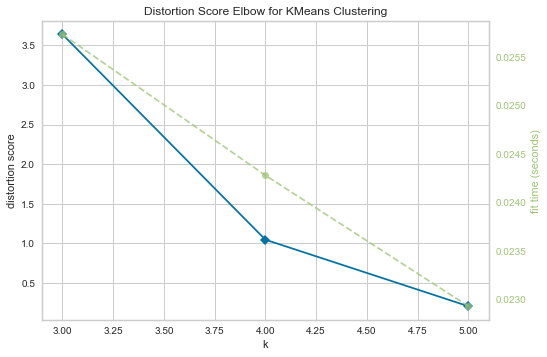

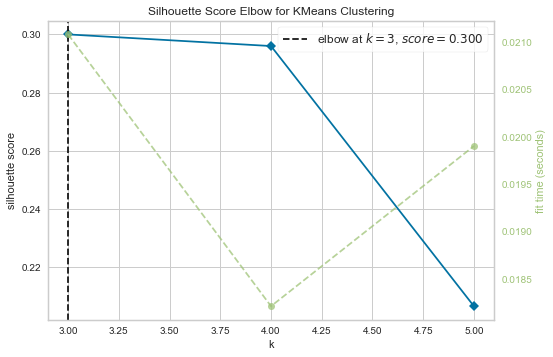

/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



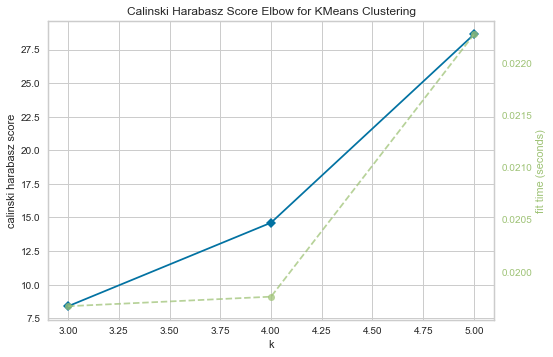

In [63]:
for metric in  ['distortion', 'silhouette', 'calinski_harabasz']:
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(3,6), metric = metric)
    visualizer.fit(df_data_prueba_escalado)
    visualizer.show() 

In [47]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [74]:
kmeans_prueba_5= KMeans(4)
kmeans_prueba_5.fit(df_data_prueba_escalado)

KMeans(n_clusters=4)

In [75]:
df_data_prueba_escalado['clusters'] = kmeans_prueba_5.labels_

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_37902/2998422915.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
cluster_summary =  df_data_prueba_escalado.groupby('clusters').mean().T.reset_index()
cluster_summary

clusters,index,0,1,2,3
0,utilidad_real,-0.283738,-0.930614,2.039294,-0.257465
1,inversion,0.190257,-1.743409,1.312116,-0.139479
2,ventas_vendedor,-0.216547,-1.670508,1.206478,1.113672
3,paqueteria_o_gasto_extra,-0.503600,-0.524093,2.220097,-0.185205


/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



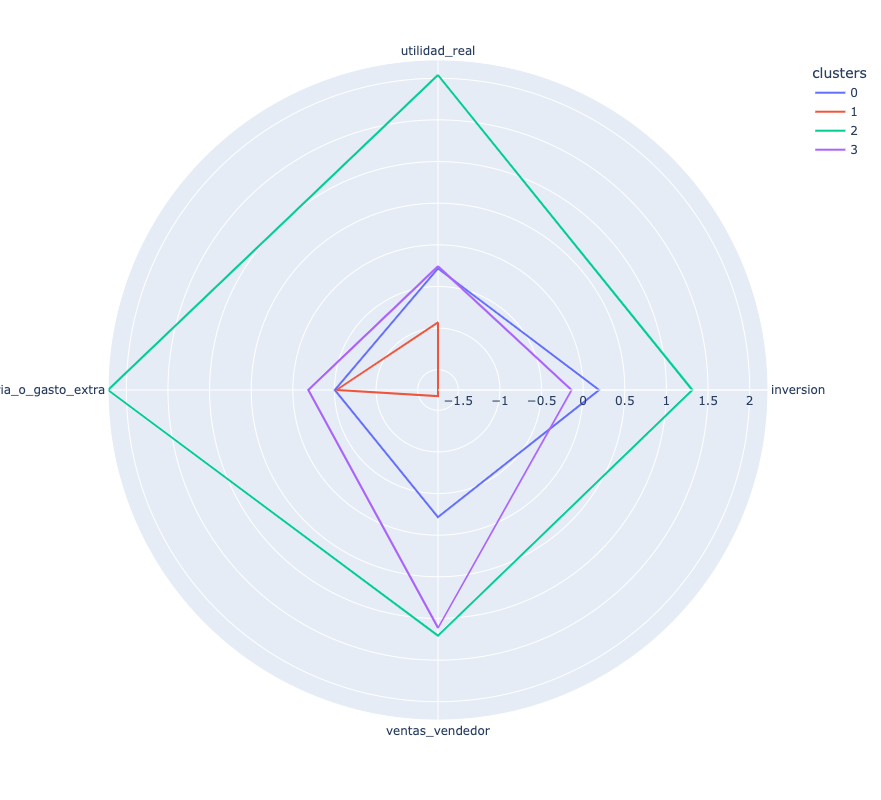

In [77]:
import plotly.express as px
fig = px.line_polar(cluster_summary.melt(id_vars = 'index'), r='value', theta='index', color = 'clusters', line_close=True,  width=800, height=800)
fig.show()

In [78]:
df_data_prueba_escalado

,utilidad_real,inversion,ventas_vendedor,paqueteria_o_gasto_extra,clusters
vendedor,,,,,
ADRIAN GUEVARA,0.221664,0.577042,-0.672844,-0.524093,0
CARLOS ACOSTA,-0.930614,-1.743409,-1.670508,-0.524093,1
CRISTIAN HERNANDEZ,-0.913454,-0.668878,0.185612,-0.512407,0
JESSICA OSORIO,-0.159425,0.662607,-0.162411,-0.474300,0
NORMA MARTINEZ,-0.257465,-0.139479,1.113672,-0.185205,3
YANET FLORES,2.039294,1.312116,1.206478,2.220097,2


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler_min = MinMaxScaler()


In [86]:
df_data_prueba_escalado_min = df_data_prueba

In [87]:
df_data_prueba_escalado_min[['utilidad_real','inversion','ventas_vendedor','paqueteria_o_gasto_extra']] = scaler_min.fit_transform(df_data_prueba)

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_37902/2646251978.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
kmeans_prueba_min= KMeans(4)
kmeans_prueba_min.fit(df_data_prueba_escalado_min)

KMeans(n_clusters=4)

In [89]:
df_data_prueba_escalado_min['clusters'] = kmeans_prueba_min.labels_

/var/folders/c0/ffsv0l194g90gxqj1nlsmvdw0000gn/T/ipykernel_37902/2042924802.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
cluster_summary_min =  df_data_prueba_escalado_min.groupby('clusters').mean().T.reset_index()
cluster_summary_min

clusters,index,0,1,2,3
0,utilidad_real,1.0,0.116217,0.0,0.323826
1,inversion,1.0,0.438298,0.0,0.773430
2,ventas_vendedor,1.0,0.806452,0.0,0.435484
3,paqueteria_o_gasto_extra,1.0,0.063876,0.0,0.009072


/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



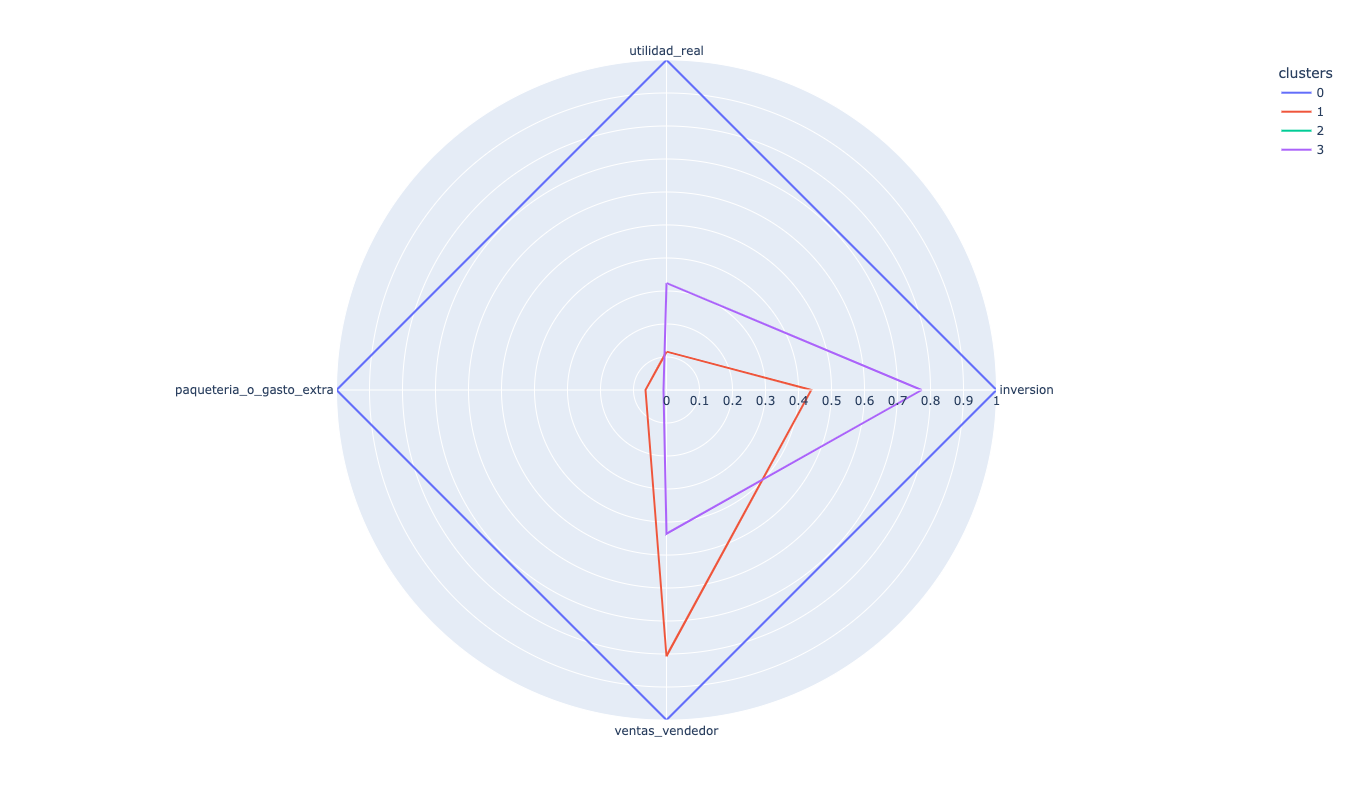

In [92]:
import plotly.express as px
fig = px.line_polar(cluster_summary_min.melt(id_vars = 'index'), r='value', theta='index', color = 'clusters', line_close=True,  width=800, height=800)
fig.show()